In [ ]:
import os
print(os.getcwd())
if os.getcwd().endswith("mri_data"):
    os.chdir("..")
    os.chdir("..")
print(os.getcwd())
from src.modelling import DeepModel_Trainer
from src.augmentation import Transformer,None_Transform
from src.data_modules import DataModule,ImagesDataset
from torch import nn
import torch
from torchvision import transforms,models
import nibabel as nib
import numpy as np
from src.evaluation import Evaluation

/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksajazwi-cpu/code/Users/pro5d-classification-prolactinoma
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksajazwi-cpu/code/Users/pro5d-classification-prolactinoma


In [ ]:
%env "WANDB_NOTEBOOK_NAME" "baseline"
%env WANDB_SILENT=True

base_transformer = Transformer(
    None_Transform(), "select_roi",med3d=True
)
# %%
def base_mlp():
    model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(
        75264, 1
    )) 
    return model

env: "WANDB_NOTEBOOK_NAME"="baseline"
env: WANDB_SILENT=True


Fold-Iteration:   0%|          | 0/1 [00:00<?, ?fold/s]/anaconda/envs/azureml_py38/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksajazwi-cpu/code/Users/pro5d-classification-prolactinoma/src/modelling.py:188: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.cl

{'index_batch': 1, 'epoch': 0, 'loss batch': tensor(0.6739, grad_fn=<BinaryCrossEntropyBackward0>)}


/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksajazwi-cpu/code/Users/pro5d-classification-prolactinoma/src/modelling.py:278: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_labels = torch.tensor(batch["label"],dtype=torch.float).to(device)
Epoch-Iteration: 100%|██████████| 1/1 [00:19<00:00, 19.20s/epoch]

{'epoch': 0, 'Loss train': 0.6738691329956055, 'Loss val': tensor(0.4872, dtype=torch.float64), 'sensitivity_val': 0.0, 'specificity_val': 1.0, 'auc_val': 0.6057692307692307, 'sensitivity_train': 1.0, 'specificity_train': 0.4444444444444444, 'auc_train': 0.7222222222222222}
{'sensitivity eval': 0.0, 'specificity eval': 1.0, 'auc eval': 0.6057692307692307}


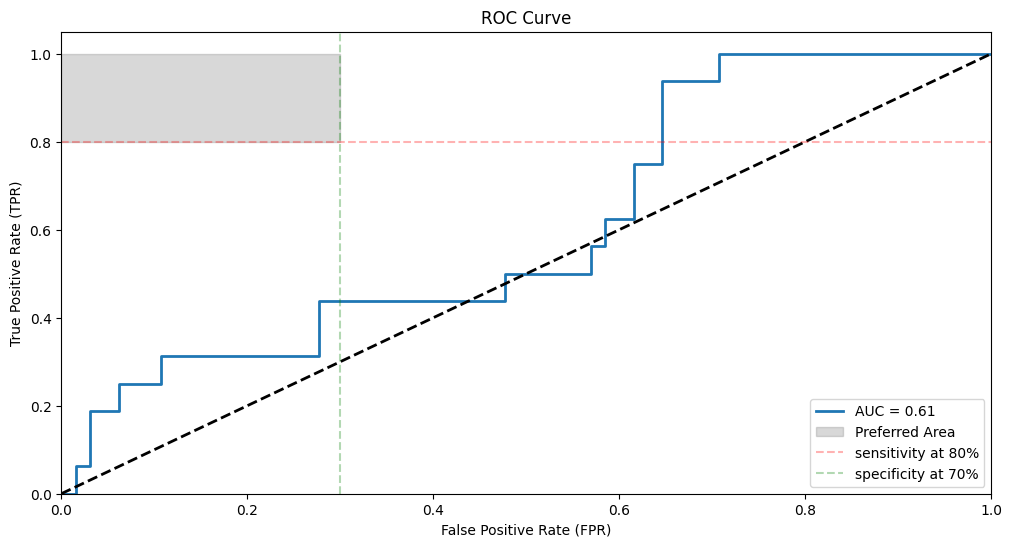

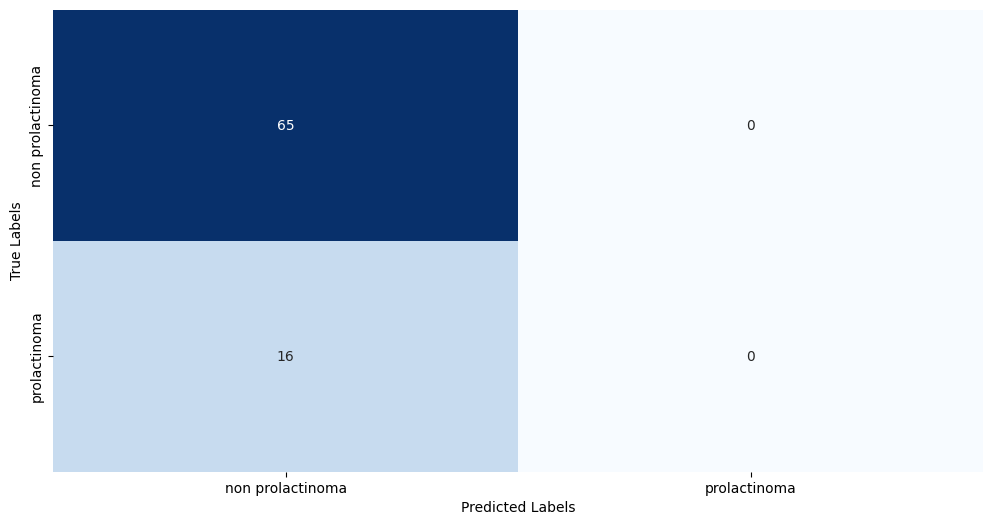

{'index false positiv eval': array([], dtype=int64), 'index false negativ eval': array([ 4, 10, 12, 23, 26]), 'index true positiv eval': array([], dtype=int64), 'index true negativ eval': array([0, 1, 2, 3, 5])}


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksajazwi-cpu/code/Users/pro5d-classification-prolactinoma/src/modelling.py:278: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

{'sensitivity test': 0.06666666666666667, 'specificity test': 0.9891304347826086, 'auc test': 0.7260869565217392}


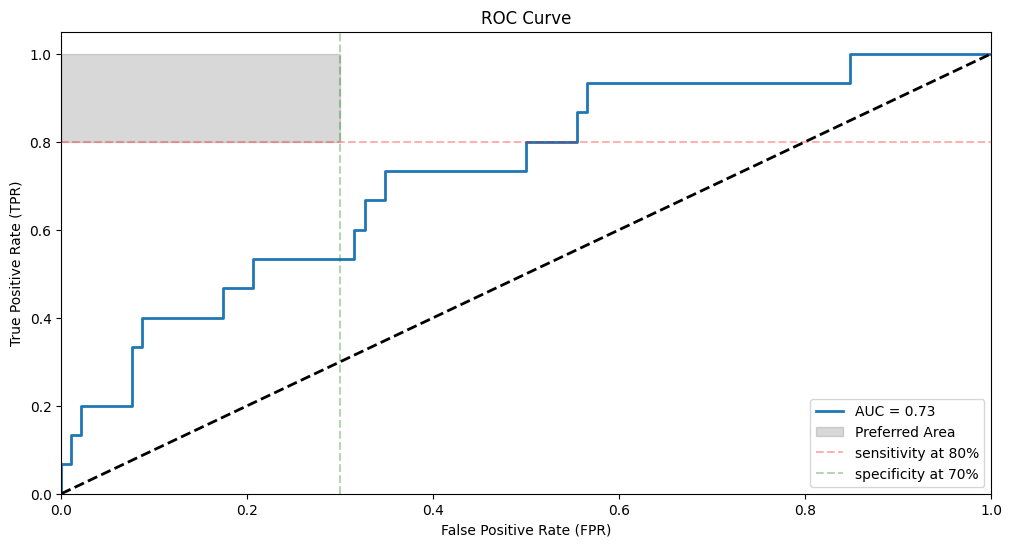

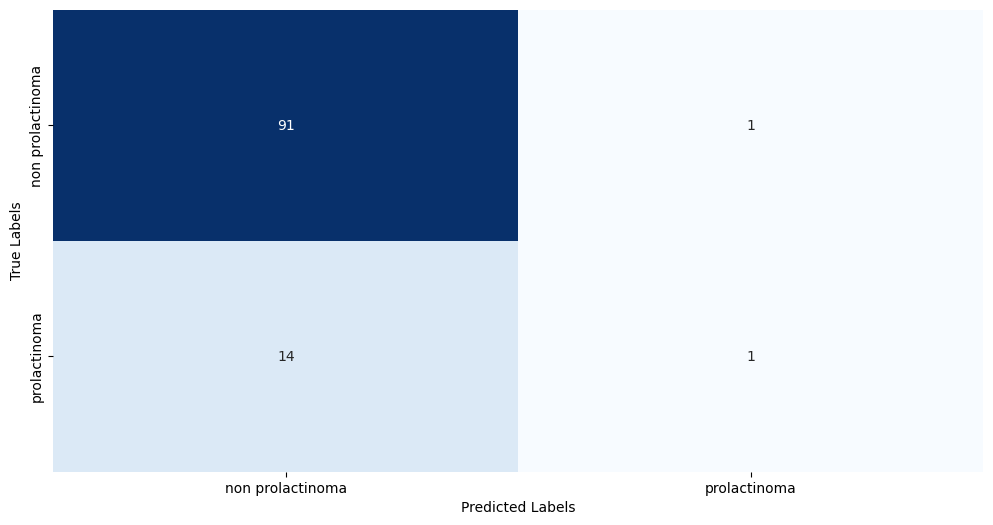

Fold-Iteration: 100%|██████████| 1/1 [00:46<00:00, 46.46s/fold]

{'index false positiv test': array([46]), 'index false negativ test': array([5, 6, 7, 8, 9]), 'index true positiv test': array([106]), 'index true negativ test': array([0, 1, 2, 3, 4])}


In [3]:
baseline = DeepModel_Trainer(DataModule(base_transformer), base_mlp)
baseline.train_model("Baseline MLP", "base_mlp", num_epochs=1, test_model=True,batchsize_train_data=10,use_mri_images=True,use_tabular_data=False,num_workers=0,
                     save_model=False,
                     cross_validation=False,lr=0.0001,evaluate_test_set=True)

In [4]:
Evaluation().visualize_slices([4,5],"test")

interactive(children=(IntSlider(value=0, description='mri', max=1), IntSlider(value=9, description='slice_numb…